In [1]:
%matplotlib inline
import ipywidgets as widgets
import gensim
import os
import matplotlib.pyplot as plt
import bidi.algorithm
import arabic_reshaper

## Word embedding model for arabic
This app allows you to find related words in a word embedding model for Arabic.

The current model is the Wikipedia CBOW model from [AraVec](https://github.com/bakrianoo/aravec), see: Abu Bakr Soliman, Kareem Eisa, and Samhaa R. El-Beltagy, “AraVec: A set of Arabic Word Embedding Models for use in Arabic NLP”, in proceedings of the 3rd International Conference on Arabic Computational Linguistics (ACLing 2017), Dubai, UAE, 2017.

In [12]:
#model_path = 'data'
#model_path = '/media/sf_VBox_Shared/Arabic/wordembedding/keyed-vectors/'
model_path = '/media/sf_VBox_Shared/Arabic/Analyses/Fiqh_final2/wordembedding/wv'

In [13]:
# To do: list multiple available models and only download them when needed
models = {}
filenames = os.listdir(model_path)
for fn in filenames:
    try:
        models[fn] = gensim.models.KeyedVectors.load(os.path.join(model_path, fn))
    except:
        pass

In [9]:
nicer_names_dict = {'wikipedia_cbow_100': 'Wikipedia',
                    'cbow-fiqh-100-wikipedia-finetuned-wv': 'Wikipedia+Fiqh',
                   'fiqh-i10-s100-w5-sg0_wv': 'Fiqh', 
                   'stemmed-fiqh-i10-s100-w5-sg0_wv': 'Stemmed Fiqh',
                   'fiqh-norm-i10-s100-w5-sg0_wv': 'Normalized Fiqh'}

In [10]:
models = {nicer_names_dict.get(model, model): models[model] for model in models}

In [14]:
models

{'fiqh-norm-i10-s100-w5-sg0_wv': <gensim.models.keyedvectors.Word2VecKeyedVectors at 0x7f092289ebe0>,
 'stemmed-fiqh-i10-s100-w5-sg0': <gensim.models.word2vec.Word2Vec at 0x7f0964140160>}

In [12]:
def most_similar(word, model, topn=10):
    res = model.wv.most_similar(word, topn=topn)
    output = [u'{} \t{:.3f}'.format(w, s) for w, s in res]
    return '\n'.join(output)

In [13]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def plot_embedding(word_list, model, method='pca', learning_rate=60, colors=None):
    X = model[word_list]
    if method is 'pca':
        X_embedded = PCA(n_components=2).fit_transform(X)
    else:
        X_pre = PCA(n_components=30).fit_transform(X)
        X_embedded = TSNE(n_components=2, learning_rate=learning_rate, random_state=0).fit_transform(X_pre)

    plt.figure(figsize=(15,15))
    plt.scatter(X_embedded[:,0], X_embedded[:,1], c=colors)
    plt.axis('off')
    for i, w in enumerate(word_list):
        display_word = bidi.algorithm.get_display(arabic_reshaper.reshape(w))
        plt.annotate(display_word, xy=(X_embedded[i, 0], X_embedded[i, 1]), fontsize=20)
    plt.show()

In [14]:
def plot_closest_words(word, model, method='pca', topn=30, learning_rate=60, colors=None):
    word_list = [w for w, s in model.wv.most_similar(word, topn=topn)]
    word_list.append(word)
    plot_embedding(word_list, model, method, learning_rate, colors)

/home/dafne/anaconda3/envs/adh/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/dafne/anaconda3/envs/adh/lib/python3.7/site-packages/gensim-3.6.0-py3.7-linux-x86_64.egg/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


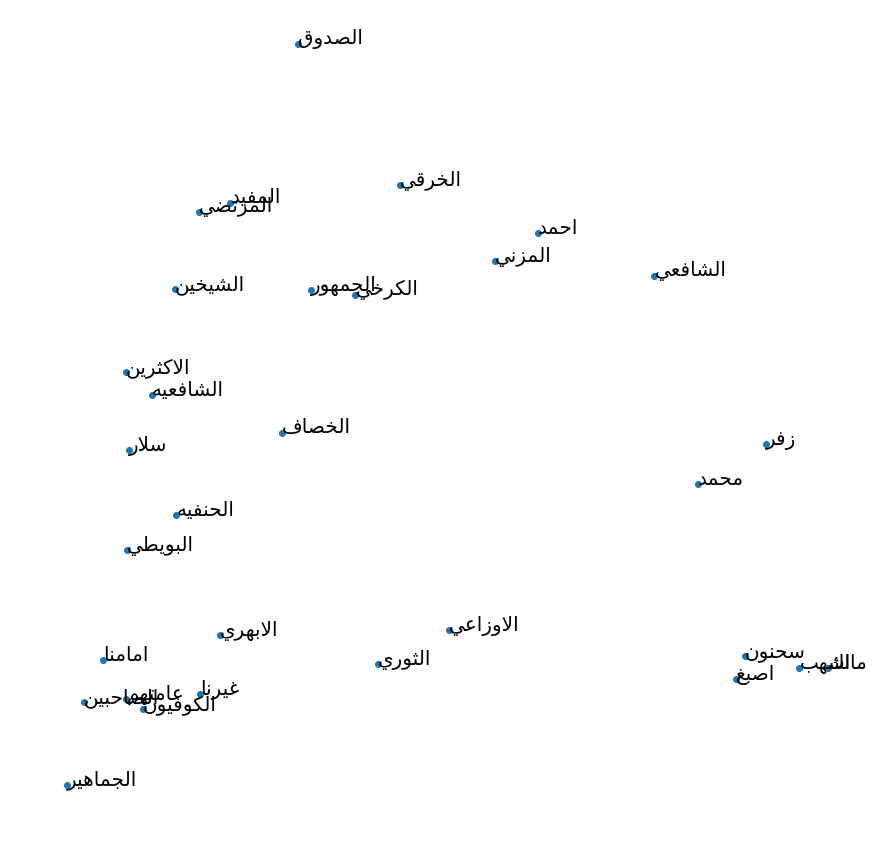

In [19]:
model = models['Normalized Fiqh']
word = 'الشافعي'
plot_closest_words(word, model, method='pca', topn=30)

In [22]:
import re
def get_pattern_from_root(root):
    return '.*'+ root[0] + '.*' + root[1] + '.*' + root[2]+'.*'


root1 = 'حلل'
root2 = 'حرم'
m1 = get_pattern_from_root(root1)
m2 = get_pattern_from_root(root2)
re.match(m1, word1), re.match(m2, word2)

(<re.Match object; span=(0, 4), match='حلال'>,
 <re.Match object; span=(0, 4), match='حرام'>)

In [23]:
word1 = 'حلال'
word2 = 'حرام'
model = models['Normalized Fiqh']
#model = models['Fiqh']
n =  20
word_list = [word1] + [w for w, s in model.wv.most_similar(word1, topn=n)] \
  + [word2] + [w for w, s in model.wv.most_similar(word2, topn=n)]
word_list = list(set(word_list))
colors = ['grey']*len(word_list)
for i, w in enumerate(word_list):
    if re.match(m1, w) is not None:
        colors[i] = 'green'
    if re.match(m2, w) is not None:
        colors[i] = 'red'
list(zip(word_list, colors))

/home/dafne/anaconda3/envs/adh/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


[('سحت', 'grey'),
 ('ذكي', 'grey'),
 ('لعب', 'grey'),
 ('تحريم', 'red'),
 ('محرمه', 'red'),
 ('حلال', 'green'),
 ('خبيث', 'grey'),
 ('قمار', 'grey'),
 ('وحلال', 'green'),
 ('وحرام', 'red'),
 ('ميته', 'grey'),
 ('بميته', 'grey'),
 ('مباح', 'grey'),
 ('مكروه', 'grey'),
 ('صيد', 'grey'),
 ('حرام', 'red'),
 ('مول', 'grey'),
 ('اصطاده', 'grey'),
 ('كالميته', 'grey'),
 ('لمحرم', 'red'),
 ('حراما', 'red'),
 ('مظاهر', 'grey'),
 ('محظور', 'grey'),
 ('الحلال', 'green'),
 ('مذكي', 'grey'),
 ('وقيذ', 'grey'),
 ('محرم', 'red'),
 ('بحلال', 'green'),
 ('للحلال', 'green'),
 ('حلالا', 'green'),
 ('ماجور', 'grey'),
 ('حرم', 'red')]

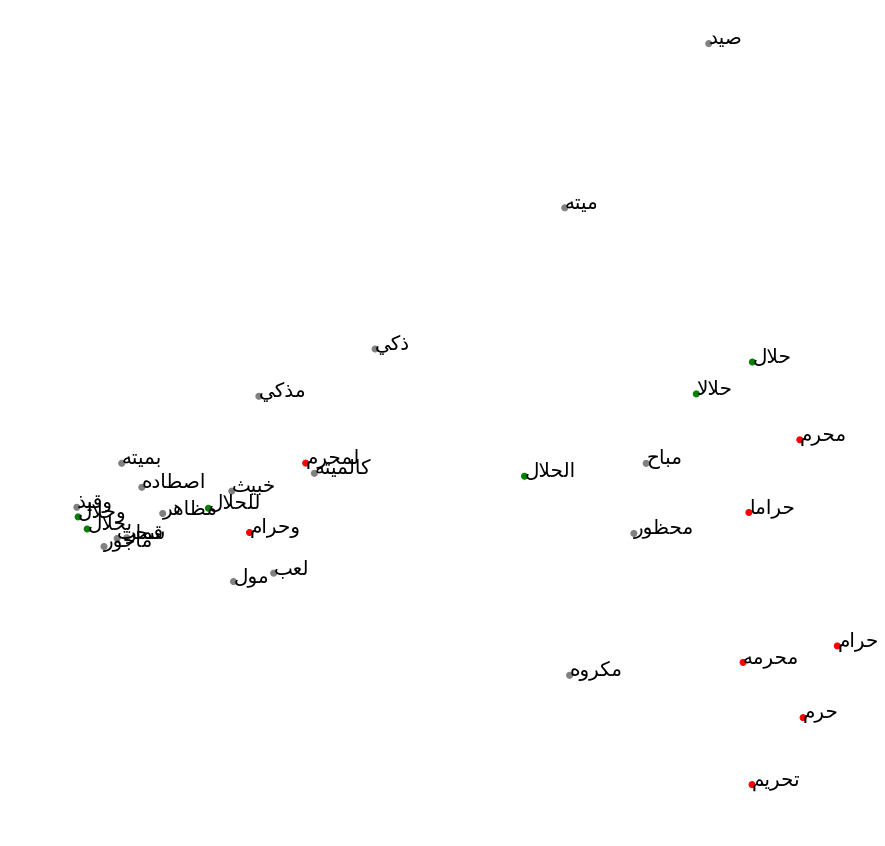

In [24]:
plot_embedding(word_list, model, method='pca', colors=colors)

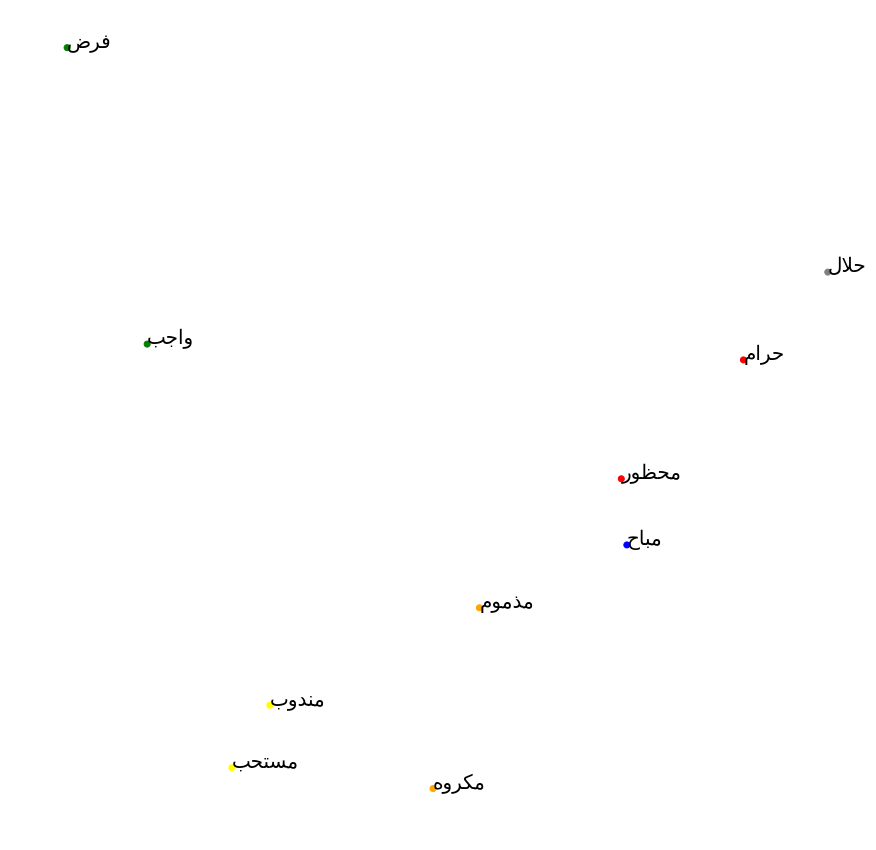

In [97]:
word_list = ['محظور', # forbidden
            'حرام', # forbidden
            'مكروه', # discouraged
            'مذموم', # discouraged
            'مباح', # neutral
            'مندوب', # recommended
            'مستحب', # recommended
            'واجب', # obligatory
            'فرض', # obligatory
            'حلال'] # allowed
colors = ['red', 'red', 'orange', 'orange', 'blue', 'yellow', 'yellow', 'green', 'green', 'grey']
model = models['Stemmed Fiqh']
plot_embedding(word_list, model, method='pca', colors=colors, learning_rate=5)

/home/dafne/anaconda3/envs/adh/lib/python3.7/site-packages/gensim-3.6.0-py3.7-linux-x86_64.egg/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


نساء:	 ['مسلمات', 'ونساء', 'عصباتها']
حره:	 ['امه', 'كتابيه', 'كافره']
جاريه:	 ['امه', 'بجاريه', 'جاريته']


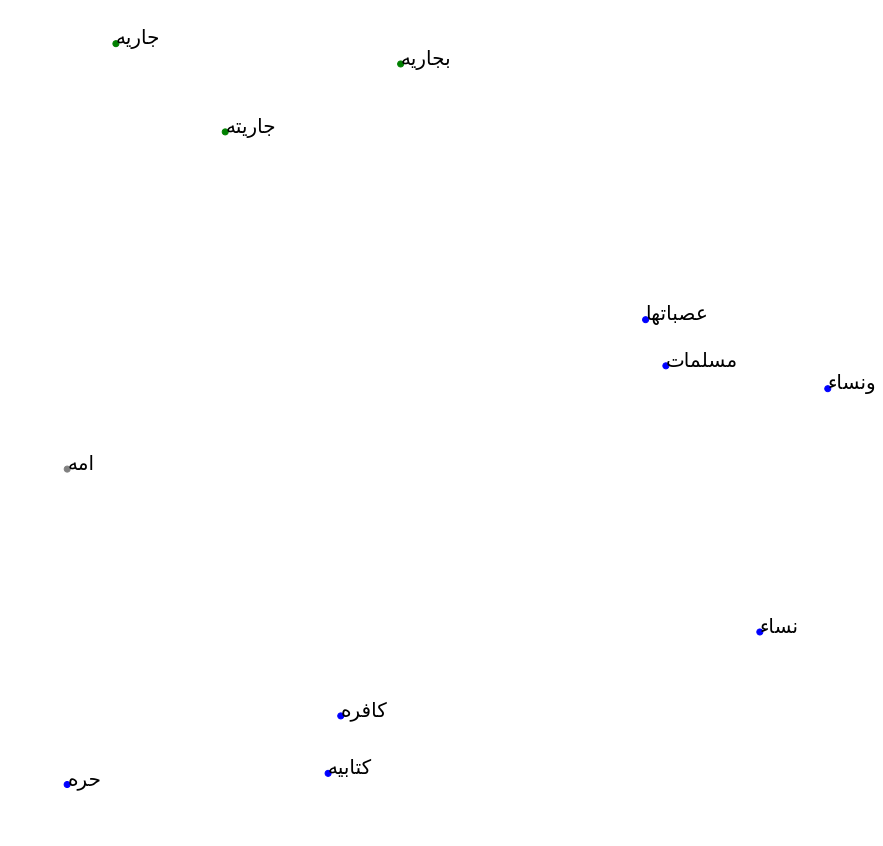

In [27]:
words = [#'مرأه', # woman
            'نساء', # women
            'حره', # free woman
            'جاريه'] # slave woman
colors = ['blue', 'blue', 'green', 'red']
word_dict = {}
for word, color in zip(words, colors):
    word_dict[word] = color
    sim_words = [w for w, s in model.most_similar(word, topn=3)]
    print(u'{}:\t {}'.format(word, sim_words))
    for w in sim_words:
        if w in word_dict:
            if w not in words:
                word_dict[w] = 'grey'
        else:
            word_dict[w] = color
#model = models['Stemmed Fiqh']
model = models['Normalized Fiqh']
word_list = list(word_dict.keys())
color_list = [word_dict[w] for w in word_list]
plot_embedding(word_list, model, method='pca', colors=color_list)